# Questions to Answer

1. Why is your proposal important in today’s world? How predicting a good client is worthy for a bank? 

This proposal is important in today's world because financial healthiness is important to both Banks and Customers to have healthy economic ecosystem. Predicting a good client is worthy for a bank because of benefits like credit card fees, finance charges, merchant fees, marketing tie up charges. Especially Annual fees generates a high revenue for banks. For customers the advantage of credit cards are easy access,building a line of credit,EMI facility and a complete record of expenses.

2. How is it going to impact the banking sector?

Success of banking sector depends on successful retrival of loans and presence of no defaulters.Bad loans will affect the maintainance of bank.Because the key factors for bank's success are credit,lending rates.Banking sector should keep an eye on financial flow and 3 factors are ROA-Return on asset(bank's earning of interest on loans), ROE-Return on equity(net-income/shareholders-equity) and NIM-Net interest margin(amount of money).

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any bank in India.

a. If any previous loans were taken by indivisuals then they should be mentioned.In married cases both partners loans status should be given.
b. CIBIL score should be mentioned.
c. EmailID and contact information should be more clear.
d. Ancestral property if any they should be mentioned.
e. Movable and Immovable assets of indivisuals should be mentioned. In married cases both partners should be mentioned.
f. Days past due must be mentioned of previous loans.

# Initial Hypothesis (or hypotheses)

If we consider DA track the most important feature that impact the ML model is the statistical[if distribution is normal or not] distribution of Annual income, because it key factor in credit card approval.
If we consider the ML approach the combination of any two columns alternative to main stream of considering the annual income. Like the combination of car owned, property owned, housing type can be considered.

#  Data analysis approach

The method adopted is CRISP-DM:

1.Business Problem Understanding:
Aim of this project is to predict whether a credit card is approved to user or not based on their financial data availability and stability.

2.Data Understanding:
Data has both continuous and discrete data values. Both categorical and numerical values are present. The crucial numerical details like Annual income, property owned by users can be used to predict whether the user is financially stable. Other details like phone number, emailid can be considered as data but they cannot be used to ML.

3.Data Preprocessing:
EDA is the exploratory data analysis which involves data cleaning, renaming of columns if needed, checking data types, checking missing values, checking outliers, importing all the libraries required to process the data.

Steps involved in this project are:

1. Reading the Dataset from Excel and getting the information of all columns including the datatypes.
2. First doing Univariate analysis, where each column data distribution is observed which are considered important for predicting the outcome.And also a general heatmap, which gives the corelation of all columns, that is snapshot of relation between columns is observed.
3. Missing Values[Data cleaning]: All coulmns are checked if any missing values are present, because if any NaN value is present then it can't be used for training purpose and can't be analysed using ML.
4. In this case the missing values are used using bfill method which is backward fill.
5. Irrelevant columns are dropped from dataset using drop method.
6. Key column for the data analysis the Annual income column is checked for outliers, because outliers bring down the efficiency of ML models.
7. Since Annual income had outliers, they are replaced using iqr formula.This helps to remove outliers and also have its statistical value comes nearer to the normal distribution reducing its skewness.In this case box plot and qq plot are used for graphical representation of theoritical and formulas used on data.
8. Encoding[Data Wrangling]: Since only numerical values should be present when ML models analyze data, all categorical values must be converted t numerical values.
1. Label Encoding: It is used when the answer is like YES or NO, in this case both car and property owned columns are encoded using Label Encoding.
2. Ordinal Encoding: It is used for EDUCATION column, because there is a meaningful orderin this column meaning that Academic degree has more points than that of Secondary education. Scaling starts from 0.
3. One-Hot Encoding: Remaning all categorical columns are encoded using One-Hot encoding. This is little like nominal encoding where there is no ranking. And in this the Dummy Variable Trap is also considered and acted upon correctly.
9. The other Excel file which has the label data that is saying whether the credit card is approved or denied is merged with this cleaned and preocessed data.
10. Data splitting[Train-Test-Split]:In this case the alone Annual income column is considered as input data to the model and remaining columns are not considered, because the credit card approval is mainly gazed upon customers capability to earn and pay back to the bank.I have not mentioned random state and hence each time it's run diffrent data from train data set is taken and tested.20% is used for testing and 80% data is used for training.
11. Modeling: In this case four ML models are used to check the efficiency: Logistic Reggression,SVM,Decision Tree,KNN.The efficiency comes above 80% for all ML models.They are classification algorithms,and they are used because the outcome of dataset is yes or no that is 0 or 1. There are only two outcomes which are credit card is issued or denied.


4. Observations:
Along with Annual Income, the car and property owned can also be considered for further detailing.
When all three columns are considered then the Decision Tree will be best.
If previous data about user credit clearance details is present then the accuracy and trustworthyness of ML model can be increased.
Outliers will affect the Data analysis and ML prediction.
Feature Engineering is very important, if irrelevant columns are used for training the model then the ML model efficiency is reduced drastically.
Data cleaning is foundation and takes most time in completing the process.
Data visualization is must to understand the statistical observations.






In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

creditdetails = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Documents\\Credit_card.csv')
creditdetails

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


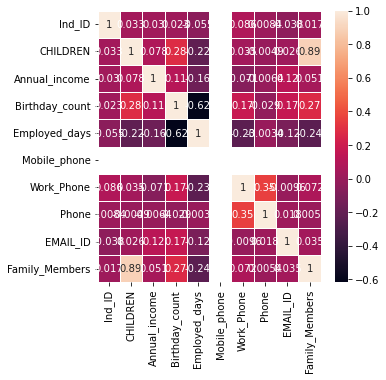

In [2]:
heat_map = creditdetails.corr()
fig = plt.subplots(figsize=(5,5))
sns.heatmap(heat_map,annot=True,linewidths = 1)
plt.show()

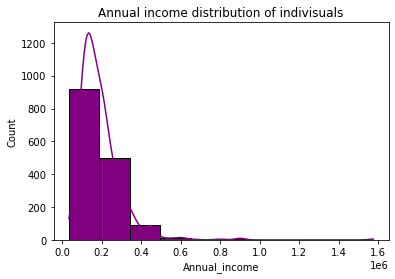

In [3]:
#The observation made is annual income column is right skewed
sns.histplot(creditdetails['Annual_income'],bins=10,kde=True,facecolor='purple')
plt.xlabel('Annual_income')
plt.title('Annual income distribution of indivisuals')
plt.show()

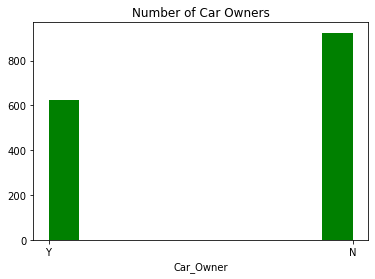

In [4]:
plt.hist(creditdetails['Car_Owner'],color='green')
#plt.ylabel('year')
plt.title('Number of Car Owners')
plt.xlabel("Car_Owner")
plt.show()

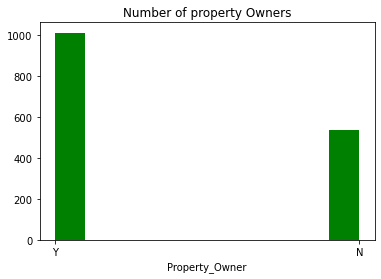

In [5]:
plt.hist(creditdetails['Property_Owner'],color='green')
#plt.ylabel('year')
plt.title('Number of property Owners')
plt.xlabel("Property_Owner")
plt.show()

In [6]:
creditdetails.shape

(1548, 18)

In [7]:
creditdetails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Property_Owner   1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [8]:
creditdetails.describe(include='all')

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
count,1.548000e+03,1541,1548,1548,1548.000000,1.525000e+03,1548,1548,1548,1548,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1060,1548.000000
unique,NaN,2,2,2,NaN,NaN,4,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,18,NaN
top,NaN,F,N,Y,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,Laborers,NaN
freq,NaN,973,924,1010,NaN,NaN,798,1031,1049,1380,NaN,NaN,NaN,NaN,NaN,NaN,268,NaN
mean,5.078920e+06,NaN,NaN,NaN,0.412791,1.913993e+05,NaN,NaN,NaN,NaN,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,NaN,2.161499
std,4.171759e+04,NaN,NaN,NaN,0.776691,1.132530e+05,NaN,NaN,NaN,NaN,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,NaN,0.947772
min,5.008827e+06,NaN,NaN,NaN,0.000000,3.375000e+04,NaN,NaN,NaN,NaN,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,NaN,1.000000
25%,5.045070e+06,NaN,NaN,NaN,0.000000,1.215000e+05,NaN,NaN,NaN,NaN,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
50%,5.078842e+06,NaN,NaN,NaN,0.000000,1.665000e+05,NaN,NaN,NaN,NaN,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,NaN,2.000000
75%,5.115673e+06,NaN,NaN,NaN,1.000000,2.250000e+05,NaN,NaN,NaN,NaN,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,NaN,3.000000


In [9]:
creditdetails.dtypes

Ind_ID               int64
GENDER              object
Car_Owner           object
Property_Owner      object
CHILDREN             int64
Annual_income      float64
Type_Income         object
EDUCATION           object
Marital_status      object
Housing_type        object
Birthday_count     float64
Employed_days        int64
Mobile_phone         int64
Work_Phone           int64
Phone                int64
EMAIL_ID             int64
Type_Occupation     object
Family_Members       int64
dtype: object

In [10]:
creditdetails.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [11]:
#creating a copy of data
copy_creditdetails = creditdetails
copy_creditdetails

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [12]:
#Dropping the irrelevant columns
copy_creditdetails.drop('Mobile_phone',axis=1,inplace=True)

In [13]:
copy_creditdetails.drop('Work_Phone',axis=1,inplace=True)

In [14]:
copy_creditdetails.drop('EMAIL_ID',axis=1,inplace=True)

In [15]:
copy_creditdetails.drop('Phone',axis=1,inplace=True)

In [16]:
copy_creditdetails

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2


In [17]:
copy_creditdetails['Annual_income'].describe()

count    1.525000e+03
mean     1.913993e+05
std      1.132530e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64

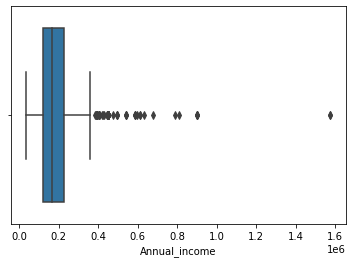

In [18]:
#Outliers presecence can be observed
sns.boxplot(copy_creditdetails['Annual_income'])
plt.show()

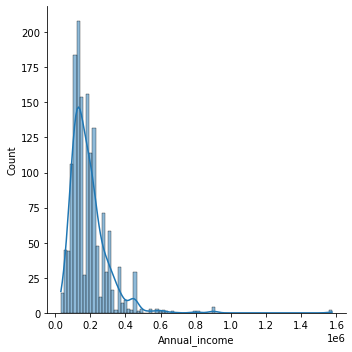

In [19]:
sns.displot(copy_creditdetails['Annual_income'],kde=True)
plt.show()
#The column is right skewed

In [20]:
#Calculating IQR

percentile25 = copy_creditdetails['Annual_income'].quantile(0.25)
percentile75 = copy_creditdetails['Annual_income'].quantile(0.75)

In [21]:
percentile75

225000.0

In [22]:
percentile25

121500.0

In [23]:
iqr = percentile75-percentile25 
iqr

103500.0

In [24]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [25]:
print('upper ',upper_limit)
print('lower ',lower_limit)

upper  380250.0
lower  -33750.0


In [26]:
copy_creditdetails[copy_creditdetails['Annual_income'] > upper_limit ]

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
8,5010864,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18173.0,-678,Core staff,3
9,5010868,M,Y,Y,1,450000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-18173.0,-678,Core staff,3
10,5010869,M,Y,Y,1,450000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-18173.0,-678,Core staff,1
14,5021303,M,N,N,1,472500.0,Pensioner,Higher education,Married,With parents,-8907.0,-913,NaN,3
25,5024213,F,Y,Y,0,540000.0,Commercial associate,Higher education,Married,House / apartment,-15702.0,-185,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,5095423,M,Y,Y,0,405000.0,Working,Higher education,Married,House / apartment,-11723.0,-1830,NaN,2
1467,5113401,M,Y,Y,0,450000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10837.0,-588,Sales staff,1
1479,5126562,F,N,N,0,450000.0,Working,Higher education,Married,House / apartment,-11082.0,-3361,Sales staff,2
1495,5090302,F,N,Y,0,405000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17427.0,-4874,Sales staff,2


In [27]:
copy_creditdetails[copy_creditdetails['Annual_income'] < lower_limit ]

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members


In [28]:
#TRIMMING

new_copy_creditdetails = copy_creditdetails[copy_creditdetails['Annual_income'] < upper_limit]

In [29]:
new_copy_creditdetails.shape

(1452, 14)

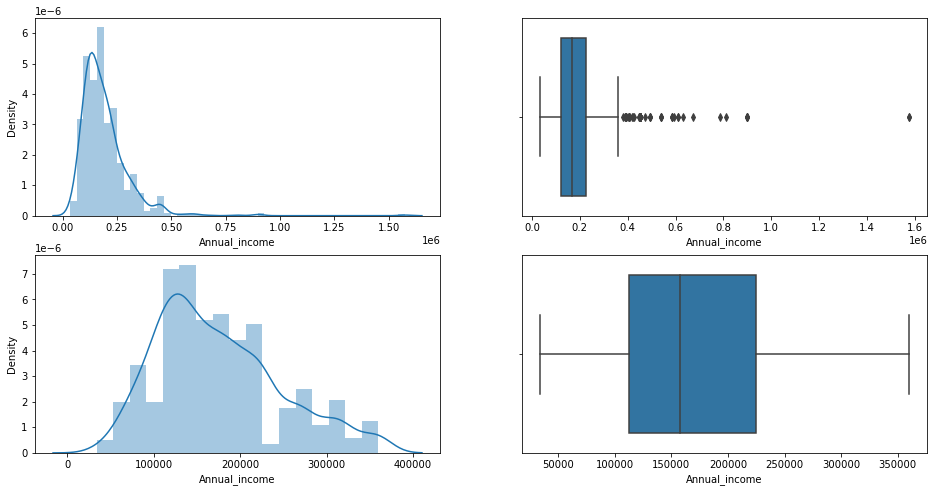

In [30]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(copy_creditdetails['Annual_income'])

plt.subplot(2,2,2)
sns.boxplot(copy_creditdetails['Annual_income'])

plt.subplot(2,2,3)
sns.distplot(new_copy_creditdetails['Annual_income'])

plt.subplot(2,2,4)
sns.boxplot(new_copy_creditdetails['Annual_income'])
plt.show()

In [31]:
new_copy_creditdetails

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
5,5009753,NaN,Y,N,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,Drivers,3
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2


In [32]:
#CLEAN_DF IS NO NULL VALUES AND OUTLIERS REMOVED
#CLEAN_DF IS NO NULL VALUES AND OUTLIERS REMOVED
new_copy_creditdetails.isnull().sum()

Ind_ID               0
GENDER               5
Car_Owner            0
Property_Owner       0
CHILDREN             0
Annual_income        0
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      20
Employed_days        0
Type_Occupation    463
Family_Members       0
dtype: int64

In [33]:
complete_details = new_copy_creditdetails.fillna(method = 'bfill')

In [34]:
complete_details.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Property_Owner     0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    1
Family_Members     0
dtype: int64

In [35]:
 complete_details= complete_details.fillna(value='Drivers')

In [36]:
complete_details.isnull().sum()

Ind_ID             0
GENDER             0
Car_Owner          0
Property_Owner     0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Type_Occupation    0
Family_Members     0
dtype: int64

In [37]:
complete_details.info()
#Datatypes can be clearly identified to perform encoding

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1547
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1452 non-null   int64  
 1   GENDER           1452 non-null   object 
 2   Car_Owner        1452 non-null   object 
 3   Property_Owner   1452 non-null   object 
 4   CHILDREN         1452 non-null   int64  
 5   Annual_income    1452 non-null   float64
 6   Type_Income      1452 non-null   object 
 7   EDUCATION        1452 non-null   object 
 8   Marital_status   1452 non-null   object 
 9   Housing_type     1452 non-null   object 
 10  Birthday_count   1452 non-null   float64
 11  Employed_days    1452 non-null   int64  
 12  Type_Occupation  1452 non-null   object 
 13  Family_Members   1452 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 170.2+ KB


In [38]:
#Dividing the categorical and numerical values

catg = complete_details.select_dtypes("object")
conti =complete_details.select_dtypes("number")

catg

,GENDER,Car_Owner,Property_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Type_Occupation
0,M,Y,Y,Pensioner,Higher education,Married,House / apartment,Cooking staff
1,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Cooking staff
2,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Cooking staff
4,F,Y,N,Commercial associate,Higher education,Married,House / apartment,Cooking staff
5,F,Y,N,Pensioner,Higher education,Married,House / apartment,Cooking staff
...,...,...,...,...,...,...,...,...
1542,M,Y,N,State servant,Secondary / secondary special,Married,House / apartment,Drivers
1544,F,N,N,Commercial associate,Incomplete higher,Single / not married,House / apartment,Accountants
1545,M,Y,Y,Working,Higher education,Married,House / apartment,Managers
1546,M,Y,N,Working,Secondary / secondary special,Civil marriage,House / apartment,Drivers


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [40]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
complete_details['Car_Owner']= label_encoder.fit_transform(complete_details['Car_Owner'])
  
complete_details['Car_Owner'].unique()

array([1, 0])

In [41]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
complete_details['Property_Owner']= label_encoder.fit_transform(complete_details['Property_Owner'])
  
complete_details['Property_Owner'].unique()

array([1, 0])

In [42]:
complete_details

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,M,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,Cooking staff,2
1,5009744,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
2,5009746,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
4,5009752,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
5,5009753,F,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,Drivers,3
1544,5023655,F,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1
1545,5115992,M,1,1,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4
1546,5118219,M,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2


In [43]:
complete_details['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [44]:
complete_details['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [45]:
complete_details['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [46]:
complete_details['Housing_type'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [47]:
complete_details['Type_Occupation'].unique()

array(['Cooking staff', 'Laborers', 'Sales staff', 'Accountants',
       'High skill tech staff', 'Cleaning staff', 'Drivers',
       'Low-skill Laborers', 'IT staff', 'Managers',
       'Waiters/barmen staff', 'Core staff', 'Medicine staff',
       'Security staff', 'Private service staff', 'HR staff',
       'Secretaries', 'Realty agents'], dtype=object)

In [48]:
complete_details['EDUCATION'].unique()

array(['Higher education', 'Secondary / secondary special',
       'Lower secondary', 'Incomplete higher', 'Academic degree'],
      dtype=object)

In [49]:
from sklearn.preprocessing import OrdinalEncoder

In [50]:
enc = OrdinalEncoder()
enc

OrdinalEncoder()

In [51]:
complete_details

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members
0,5008827,M,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,Cooking staff,2
1,5009744,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
2,5009746,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
4,5009752,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
5,5009753,F,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,Drivers,3
1544,5023655,F,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1
1545,5115992,M,1,1,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4
1546,5118219,M,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2


In [52]:
complete_details['Marital_status'].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [53]:
marital_dummies = pd.get_dummies(complete_details.Marital_status)
marital_dummies

,Civil marriage,Married,Separated,Single / not married,Widow
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
4,0,1,0,0,0
5,0,1,0,0,0
...,...,...,...,...,...
1542,0,1,0,0,0
1544,0,0,0,1,0
1545,0,1,0,0,0
1546,1,0,0,0,0


In [54]:
merged = pd.concat([complete_details,marital_dummies],axis='columns')
merged

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Civil marriage,Married,Separated,Single / not married,Widow
0,5008827,M,1,1,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,Cooking staff,2,0,1,0,0,0
1,5009744,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2,0,1,0,0,0
2,5009746,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2,0,1,0,0,0
4,5009752,F,1,0,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2,0,1,0,0,0
5,5009753,F,1,0,0,315000.0,Pensioner,Higher education,Married,House / apartment,-13557.0,-586,Cooking staff,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,Drivers,3,0,1,0,0,0
1544,5023655,F,0,0,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,Accountants,1,0,0,0,1,0
1545,5115992,M,1,1,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,Managers,4,0,1,0,0,0
1546,5118219,M,1,0,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,Drivers,2,1,0,0,0,0


In [55]:
clean_df1 = merged.drop(['Marital_status','Civil marriage'],axis='columns')
clean_df1

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Married,Separated,Single / not married,Widow
0,5008827,M,1,1,0,180000.0,Pensioner,Higher education,House / apartment,-18772.0,365243,Cooking staff,2,1,0,0,0
1,5009744,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0
2,5009746,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0
4,5009752,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0
5,5009753,F,1,0,0,315000.0,Pensioner,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,State servant,Secondary / secondary special,House / apartment,-11294.0,-3536,Drivers,3,1,0,0,0
1544,5023655,F,0,0,0,225000.0,Commercial associate,Incomplete higher,House / apartment,-10229.0,-1209,Accountants,1,0,0,1,0
1545,5115992,M,1,1,2,180000.0,Working,Higher education,House / apartment,-13174.0,-2477,Managers,4,1,0,0,0
1546,5118219,M,1,0,0,270000.0,Working,Secondary / secondary special,House / apartment,-15292.0,-645,Drivers,2,0,0,0,0


In [56]:
clean_df1['Type_Income'].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

In [57]:
income_dummies = pd.get_dummies(clean_df1.Type_Income)
income_dummies

,Commercial associate,Pensioner,State servant,Working
0,0,1,0,0
1,1,0,0,0
2,1,0,0,0
4,1,0,0,0
5,0,1,0,0
...,...,...,...,...
1542,0,0,1,0
1544,1,0,0,0
1545,0,0,0,1
1546,0,0,0,1


In [58]:
merged1 = pd.concat([clean_df1,income_dummies],axis='columns')
merged1

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Housing_type,Birthday_count,...,Type_Occupation,Family_Members,Married,Separated,Single / not married,Widow,Commercial associate,Pensioner,State servant,Working
0,5008827,M,1,1,0,180000.0,Pensioner,Higher education,House / apartment,-18772.0,...,Cooking staff,2,1,0,0,0,0,1,0,0
1,5009744,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,...,Cooking staff,2,1,0,0,0,1,0,0,0
2,5009746,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,...,Cooking staff,2,1,0,0,0,1,0,0,0
4,5009752,F,1,0,0,315000.0,Commercial associate,Higher education,House / apartment,-13557.0,...,Cooking staff,2,1,0,0,0,1,0,0,0
5,5009753,F,1,0,0,315000.0,Pensioner,Higher education,House / apartment,-13557.0,...,Cooking staff,2,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,State servant,Secondary / secondary special,House / apartment,-11294.0,...,Drivers,3,1,0,0,0,0,0,1,0
1544,5023655,F,0,0,0,225000.0,Commercial associate,Incomplete higher,House / apartment,-10229.0,...,Accountants,1,0,0,1,0,1,0,0,0
1545,5115992,M,1,1,2,180000.0,Working,Higher education,House / apartment,-13174.0,...,Managers,4,1,0,0,0,0,0,0,1
1546,5118219,M,1,0,0,270000.0,Working,Secondary / secondary special,House / apartment,-15292.0,...,Drivers,2,0,0,0,0,0,0,0,1


In [59]:
done_df = merged1.drop(['Type_Income','Pensioner'],axis='columns')
done_df

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Housing_type,Birthday_count,Employed_days,Type_Occupation,Family_Members,Married,Separated,Single / not married,Widow,Commercial associate,State servant,Working
0,5008827,M,1,1,0,180000.0,Higher education,House / apartment,-18772.0,365243,Cooking staff,2,1,0,0,0,0,0,0
1,5009744,F,1,0,0,315000.0,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0,1,0,0
2,5009746,F,1,0,0,315000.0,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0,1,0,0
4,5009752,F,1,0,0,315000.0,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0,1,0,0
5,5009753,F,1,0,0,315000.0,Higher education,House / apartment,-13557.0,-586,Cooking staff,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,Secondary / secondary special,House / apartment,-11294.0,-3536,Drivers,3,1,0,0,0,0,1,0
1544,5023655,F,0,0,0,225000.0,Incomplete higher,House / apartment,-10229.0,-1209,Accountants,1,0,0,1,0,1,0,0
1545,5115992,M,1,1,2,180000.0,Higher education,House / apartment,-13174.0,-2477,Managers,4,1,0,0,0,0,0,1
1546,5118219,M,1,0,0,270000.0,Secondary / secondary special,House / apartment,-15292.0,-645,Drivers,2,0,0,0,0,0,0,1


In [60]:
done_df['Housing_type'].unique()

array(['House / apartment', 'Rented apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [61]:
house = pd.get_dummies(done_df.Housing_type)
house

,Co-op apartment,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
...,...,...,...,...,...,...
1542,0,1,0,0,0,0
1544,0,1,0,0,0,0
1545,0,1,0,0,0,0
1546,0,1,0,0,0,0


In [62]:
merge_done = pd.concat([done_df,house],axis='columns')

In [63]:
final = merge_done.drop(['Housing_type','Co-op apartment'],axis='columns')
final

,Ind_ID,GENDER,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,...,Single / not married,Widow,Commercial associate,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008827,M,1,1,0,180000.0,Higher education,-18772.0,365243,Cooking staff,...,0,0,0,0,0,1,0,0,0,0
1,5009744,F,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,...,0,0,1,0,0,1,0,0,0,0
2,5009746,F,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,...,0,0,1,0,0,1,0,0,0,0
4,5009752,F,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,...,0,0,1,0,0,1,0,0,0,0
5,5009753,F,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,M,1,0,1,360000.0,Secondary / secondary special,-11294.0,-3536,Drivers,...,0,0,0,1,0,1,0,0,0,0
1544,5023655,F,0,0,0,225000.0,Incomplete higher,-10229.0,-1209,Accountants,...,1,0,1,0,0,1,0,0,0,0
1545,5115992,M,1,1,2,180000.0,Higher education,-13174.0,-2477,Managers,...,0,0,0,0,1,1,0,0,0,0
1546,5118219,M,1,0,0,270000.0,Secondary / secondary special,-15292.0,-645,Drivers,...,0,0,0,0,1,1,0,0,0,0


In [64]:
final['GENDER'].unique()

array(['M', 'F'], dtype=object)

In [65]:
gender = pd.get_dummies(final.GENDER)
gender

,F,M
0,0,1
1,1,0
2,1,0
4,1,0
5,1,0
...,...,...
1542,0,1
1544,1,0
1545,0,1
1546,0,1


In [66]:
final_gender = pd.concat([final,gender],axis='columns')

In [67]:
final1 = final_gender.drop(['GENDER','F'],axis='columns')
final1

,Ind_ID,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,Family_Members,...,Widow,Commercial associate,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,M
0,5008827,1,1,0,180000.0,Higher education,-18772.0,365243,Cooking staff,2,...,0,0,0,0,1,0,0,0,0,1
1,5009744,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,2,...,0,1,0,0,1,0,0,0,0,0
2,5009746,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,2,...,0,1,0,0,1,0,0,0,0,0
4,5009752,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,2,...,0,1,0,0,1,0,0,0,0,0
5,5009753,1,0,0,315000.0,Higher education,-13557.0,-586,Cooking staff,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,0,1,360000.0,Secondary / secondary special,-11294.0,-3536,Drivers,3,...,0,0,1,0,1,0,0,0,0,1
1544,5023655,0,0,0,225000.0,Incomplete higher,-10229.0,-1209,Accountants,1,...,0,1,0,0,1,0,0,0,0,0
1545,5115992,1,1,2,180000.0,Higher education,-13174.0,-2477,Managers,4,...,0,0,0,1,1,0,0,0,0,1
1546,5118219,1,0,0,270000.0,Secondary / secondary special,-15292.0,-645,Drivers,2,...,0,0,0,1,1,0,0,0,0,1


In [68]:
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
final1['Type_Occupation']= label_encoder.fit_transform(final1['Type_Occupation'])
  
final1['Type_Occupation'].unique()

array([ 2,  8, 14,  0,  6,  1,  4,  9,  7, 10, 17,  3, 11, 16, 12,  5, 15,
       13])

In [69]:
final1

,Ind_ID,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,Family_Members,...,Widow,Commercial associate,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,M
0,5008827,1,1,0,180000.0,Higher education,-18772.0,365243,2,2,...,0,0,0,0,1,0,0,0,0,1
1,5009744,1,0,0,315000.0,Higher education,-13557.0,-586,2,2,...,0,1,0,0,1,0,0,0,0,0
2,5009746,1,0,0,315000.0,Higher education,-13557.0,-586,2,2,...,0,1,0,0,1,0,0,0,0,0
4,5009752,1,0,0,315000.0,Higher education,-13557.0,-586,2,2,...,0,1,0,0,1,0,0,0,0,0
5,5009753,1,0,0,315000.0,Higher education,-13557.0,-586,2,2,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,5118268,1,0,1,360000.0,Secondary / secondary special,-11294.0,-3536,4,3,...,0,0,1,0,1,0,0,0,0,1
1544,5023655,0,0,0,225000.0,Incomplete higher,-10229.0,-1209,0,1,...,0,1,0,0,1,0,0,0,0,0
1545,5115992,1,1,2,180000.0,Higher education,-13174.0,-2477,10,4,...,0,0,0,1,1,0,0,0,0,1
1546,5118219,1,0,0,270000.0,Secondary / secondary special,-15292.0,-645,4,2,...,0,0,0,1,1,0,0,0,0,1


In [70]:
credit_id = pd.read_csv('C:\\Users\\harsh\\OneDrive\\Documents\\Credit_card_label.csv')
credit_id

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [71]:
credit_id.isnull().sum()

Ind_ID    0
label     0
dtype: int64

In [72]:
final_dataset = pd.concat([final1,credit_id],axis='columns')
final_dataset

,Ind_ID,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,Family_Members,...,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,M,Ind_ID,label
0,5008827.0,1.0,1.0,0.0,180000.0,Higher education,-18772.0,365243.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5008827,1
1,5009744.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009744,1
2,5009746.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009746,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5009749,1
4,5009752.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5028645,0
1544,5023655.0,0.0,0.0,0.0,225000.0,Incomplete higher,-10229.0,-1209.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5023655,0
1545,5115992.0,1.0,1.0,2.0,180000.0,Higher education,-13174.0,-2477.0,10.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5115992,0
1546,5118219.0,1.0,0.0,0.0,270000.0,Secondary / secondary special,-15292.0,-645.0,4.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5118219,0


In [73]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ind_ID                1452 non-null   float64
 1   Car_Owner             1452 non-null   float64
 2   Property_Owner        1452 non-null   float64
 3   CHILDREN              1452 non-null   float64
 4   Annual_income         1452 non-null   float64
 5   EDUCATION             1452 non-null   object 
 6   Birthday_count        1452 non-null   float64
 7   Employed_days         1452 non-null   float64
 8   Type_Occupation       1452 non-null   float64
 9   Family_Members        1452 non-null   float64
 10  Married               1452 non-null   float64
 11  Separated             1452 non-null   float64
 12  Single / not married  1452 non-null   float64
 13  Widow                 1452 non-null   float64
 14  Commercial associate  1452 non-null   float64
 15  State servant        

In [74]:
final_dataset.isnull().sum()

Ind_ID                  96
Car_Owner               96
Property_Owner          96
CHILDREN                96
Annual_income           96
EDUCATION               96
Birthday_count          96
Employed_days           96
Type_Occupation         96
Family_Members          96
Married                 96
Separated               96
Single / not married    96
Widow                   96
Commercial associate    96
State servant           96
Working                 96
House / apartment       96
Municipal apartment     96
Office apartment        96
Rented apartment        96
With parents            96
M                       96
Ind_ID                   0
label                    0
dtype: int64

In [75]:
final_dataset.fillna(method = 'bfill',inplace=True)

In [76]:
final_dataset

,Ind_ID,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,Family_Members,...,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,M,Ind_ID,label
0,5008827.0,1.0,1.0,0.0,180000.0,Higher education,-18772.0,365243.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5008827,1
1,5009744.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009744,1
2,5009746.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009746,1
3,5009752.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009749,1
4,5009752.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5023655.0,0.0,0.0,0.0,225000.0,Incomplete higher,-10229.0,-1209.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5028645,0
1544,5023655.0,0.0,0.0,0.0,225000.0,Incomplete higher,-10229.0,-1209.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5023655,0
1545,5115992.0,1.0,1.0,2.0,180000.0,Higher education,-13174.0,-2477.0,10.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5115992,0
1546,5118219.0,1.0,0.0,0.0,270000.0,Secondary / secondary special,-15292.0,-645.0,4.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5118219,0


In [77]:
final_dataset.isnull().sum()

Ind_ID                  0
Car_Owner               0
Property_Owner          0
CHILDREN                0
Annual_income           0
EDUCATION               0
Birthday_count          0
Employed_days           0
Type_Occupation         0
Family_Members          0
Married                 0
Separated               0
Single / not married    0
Widow                   0
Commercial associate    0
State servant           0
Working                 0
House / apartment       0
Municipal apartment     0
Office apartment        0
Rented apartment        0
With parents            0
M                       0
Ind_ID                  0
label                   0
dtype: int64

In [78]:
final_dataset.skew().sort_values(ascending=False)

Office apartment        14.784143
Rented apartment         8.634671
Municipal apartment      5.182280
CHILDREN                 4.804759
Widow                    4.210138
With parents             4.054176
Separated                3.590052
State servant            3.267895
label                    2.446379
Family_Members           2.324426
Single / not married     2.098236
Employed_days            1.746498
Commercial associate     1.355714
Annual_income            0.623687
M                        0.587644
Car_Owner                0.422974
Type_Occupation          0.226213
Ind_ID                   0.076991
Ind_ID                   0.072346
Working                 -0.126993
Birthday_count          -0.148111
Property_Owner          -0.628985
Married                 -0.776829
House / apartment       -2.563250
dtype: float64

In [79]:
x = final_dataset.drop(columns=['label','Ind_ID','Car_Owner','Property_Owner','CHILDREN',
                              'EDUCATION','Birthday_count','Employed_days','Type_Occupation','Family_Members',
                               'State servant','Working','House / apartment','Municipal apartment',
                                'Office apartment','Rented apartment','With parents','M','Ind_ID',
                               'Married','Separated','Single / not married','Widow','Commercial associate'])
y = final_dataset['label']

In [80]:
x

,Annual_income
0,180000.0
1,315000.0
2,315000.0
3,315000.0
4,315000.0
...,...
1543,225000.0
1544,225000.0
1545,180000.0
1546,270000.0


In [81]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1543    0
1544    0
1545    0
1546    0
1547    0
Name: label, Length: 1548, dtype: int64

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)
print(x_train)

      Annual_income
9           90000.0
309         85500.0
1026       135000.0
254        360000.0
149        195750.0
...             ...
661        202500.0
685        202500.0
80         270000.0
1281       180000.0
1231       112500.0

[1238 rows x 1 columns]


In [84]:
import scipy.stats as stats

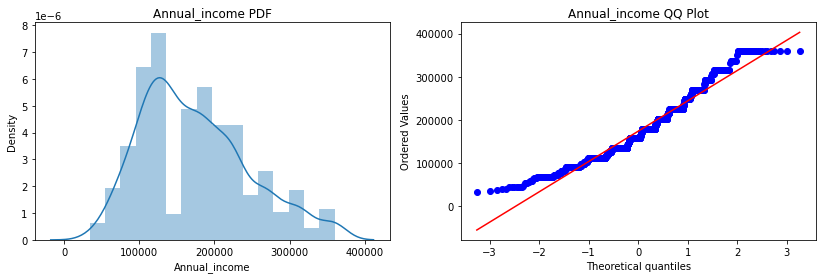

In [85]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Annual_income'])
plt.title('Annual_income PDF')

plt.subplot(122)
stats.probplot(x_train['Annual_income'], dist="norm", plot=plt)
plt.title('Annual_income QQ Plot')

plt.show()

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Annual_income'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred)*100)
print("Accuracy DT",accuracy_score(y_test,y_pred2)*100)
#Accuracy LR 0.6703910614525139
#Accuracy DT 0.659217877094972
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

Accuracy LR 93.54838709677419
Accuracy DT 92.90322580645162
LR 0.8869543359865941
DT 0.8850188521156264


In [90]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train,y_train)

SVC()

In [91]:
prediction1 = model_svc.predict(x_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,prediction1)*100)

93.54838709677419


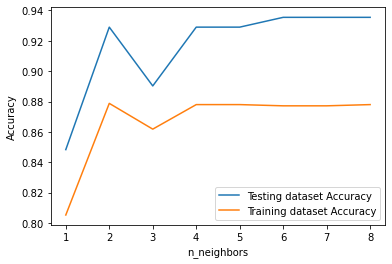

In [92]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

  
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
      
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
  
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [93]:
print(knn.score(x_test, y_test)*100)

93.54838709677419


In [95]:
final_dataset.to_excel('my_file.xlsx')

In [97]:
with pd.ExcelWriter('creditdetails.xlsx') as writer:
    final_dataset.to_excel(writer, encoding='utf8', index=False, sheet_name='Sheet_1')

In [98]:
final_dataset

,Ind_ID,Car_Owner,Property_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Type_Occupation,Family_Members,...,State servant,Working,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents,M,Ind_ID,label
0,5008827.0,1.0,1.0,0.0,180000.0,Higher education,-18772.0,365243.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,5008827,1
1,5009744.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009744,1
2,5009746.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009746,1
3,5009752.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009749,1
4,5009752.0,1.0,0.0,0.0,315000.0,Higher education,-13557.0,-586.0,2.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5009752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5023655.0,0.0,0.0,0.0,225000.0,Incomplete higher,-10229.0,-1209.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5028645,0
1544,5023655.0,0.0,0.0,0.0,225000.0,Incomplete higher,-10229.0,-1209.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5023655,0
1545,5115992.0,1.0,1.0,2.0,180000.0,Higher education,-13174.0,-2477.0,10.0,4.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5115992,0
1546,5118219.0,1.0,0.0,0.0,270000.0,Secondary / secondary special,-15292.0,-645.0,4.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5118219,0
